In [261]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import string
import matplotlib.pyplot as plt
%matplotlib inline
import math

### Import data

In [262]:
bk_1 = pd.read_csv("bk_1.csv")
bk_1.head()

,code,street,city,citystatezip,zpid,homedetails,latitude,longitude,amount,last-updated,low,high,overview,Unnamed: 13
0,0,1 John St # PHF,Brooklyn,11201,2103725998,http://www.zillow.com/homedetails/1-John-St-PH...,40.705200,-73.987400,5369075.0,11/02/2016,3812043.0,7677777.0,http://www.zillow.com/local-info/NY-New-York/D...,NaN
1,0,100 Jay St APT 25E,Brooklyn,11201,83043280,http://www.zillow.com/homedetails/100-Jay-St-A...,40.701835,-73.986798,974277.0,11/02/2016,915820.0,1042476.0,http://www.zillow.com/local-info/NY-New-York/D...,NaN
2,0,183 Plymouth St,Brooklyn,11201,121711481,http://www.zillow.com/homedetails/183-Plymouth...,40.703775,-73.985886,3825296.0,11/02/2016,3634031.0,4016561.0,http://www.zillow.com/local-info/NY-New-York/D...,NaN
3,0,85 Water St,Brooklyn,11201,64640209,http://www.zillow.com/homedetails/85-Water-St-...,40.703415,-73.991190,1006318.0,11/02/2016,935876.0,1106950.0,http://www.zillow.com/local-info/NY-New-York/D...,NaN
4,0,26 Washington St # 0S,Brooklyn,11201,2096697161,http://www.zillow.com/homedetails/26-Washingto...,40.703463,-73.989809,NaN,12/31/1969,NaN,NaN,http://www.zillow.com/local-info/NY-New-York/D...,NaN


### Divide into different pricing brackets based on the high price

In [263]:
print "Min high price: " + str(np.min(bk_1["high"]))
print "Max high price: " + str(np.max(bk_1["high"]))

Min high price: 354498.0
Max high price: 76366601.0


In [264]:
high_no_nas = bk_1["high"][np.isfinite(bk_1["high"])]
high_no_nas.quantile([0.25,0.5,0.75])

0.25    2803324.5
0.50    3688412.0
0.75    4709118.0
Name: high, dtype: float64

In [265]:
high_price_brackets = np.empty(len(bk_1))

for i in range(len(bk_1)):
    if not math.isnan(bk_1["high"][i]):
        if bk_1["high"][i] < 3000000:
            high_price_brackets[i] = 1
        elif ((bk_1["high"][i] >= 3000000) & (bk_1["high"][i] < 4000000)):
            high_price_brackets[i] = 2
        elif ((bk_1["high"][i] >= 4000000) & (bk_1["high"][i] < 5000000)):
            high_price_brackets[i] = 3
        else:
            high_price_brackets[i] = 4
    
bk_1["high_price_brackets"] = high_price_brackets

### Map colored by pricing bracket

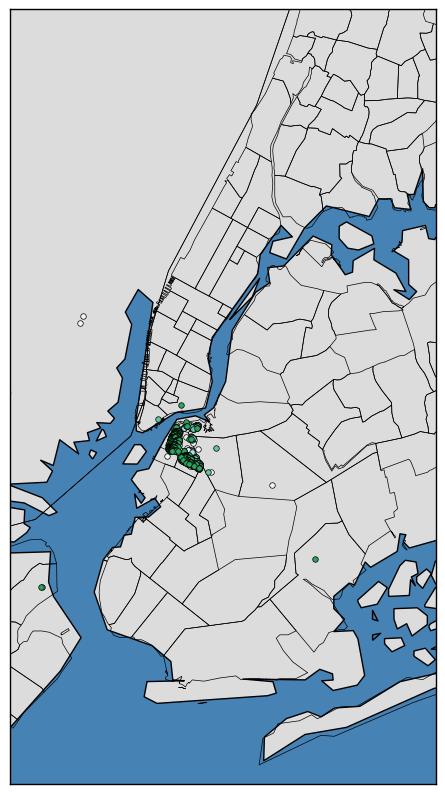

In [266]:
fig = plt.figure(figsize=(20,10))

themap = Basemap(projection='merc',
                llcrnrlon = -74.097444,              # lower-left corner longitude
                llcrnrlat = 40.533572,               # lower-left corner latitude
                urcrnrlon = -73.831712,               # upper-right corner longitude
                urcrnrlat = 40.9,               # upper-right corner latitude
                resolution = 'h',
                area_thresh = 0.1,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.drawstates()
themap.drawrivers()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

themap.readshapefile('./ZillowNeighborhoods-NY/ZillowNeighborhoods-NY', 'regions', drawbounds = True)

color_list = ["#edf8fb", "#b2e2e2", "#66c2a4", "#2ca25f"]
bracket_list = range(1,5)
for bracket in bracket_list:
    bk_1_bracket = bk_1[bk_1["high_price_brackets"] == bracket]
    x, y = themap(bk_1_bracket["longitude"].values, bk_1_bracket["latitude"].values)
    themap.plot(x, y, 'o', color=color_list[bracket-1],markersize=4)



plt.show()

In [267]:
man_1 = pd.read_csv("manhattan.csv")

In [269]:
man_1.head()

,tax_value,last_sold_price,property_size,zestimate_amount,bathrooms,zestimate_valuation_range_high,tax_year,zestimate_value_change,latitude,zestimate_percentile,...,last_sold_date,year_built,zestimate_valuationRange_low,graph_data_link,home_size,longitude,home_detail_link,home_type,map_this_home_link,Unnamed: 22
0,NaN,NaN,NaN,1712782.0,1.0,1866932.0,NaN,NaN,40.703430,0,...,NaN,NaN,1558632.0,NaN,NaN,-74.011077,http://www.zillow.com/homedetails/60-Pearl-St-...,MultiFamily2To4,http://www.zillow.com/homes/2111548740_zpid/,NaN
1,6975000.0,30150000.0,7632.0,8273160.0,NaN,9596866.0,2015.0,NaN,40.703366,0,...,02/05/2015,NaN,7032186.0,http://www.zillow.com/homedetails/1-Coenties-S...,32843.0,-74.010605,http://www.zillow.com/homedetails/1-Coenties-S...,Condominium,http://www.zillow.com/homes/31490743_zpid/,NaN
2,4748000.0,6443084.0,3074.0,16117710.0,NaN,17407127.0,2015.0,NaN,40.703308,0,...,04/28/2011,1920.0,14667116.0,http://www.zillow.com/homedetails/32-Water-St-...,9807.0,-74.011138,http://www.zillow.com/homedetails/32-Water-St-...,Condominium,http://www.zillow.com/homes/80004061_zpid/,NaN
3,27065000.0,NaN,9891.0,8247909.0,NaN,9485095.0,2015.0,NaN,40.702941,0,...,NaN,1985.0,7093202.0,http://www.zillow.com/homedetails/39-Whitehall...,169061.0,-74.012672,http://www.zillow.com/homedetails/39-Whitehall...,Condominium,http://www.zillow.com/homes/97527134_zpid/,NaN
4,NaN,NaN,NaN,8521715.0,4.0,8947801.0,NaN,NaN,40.704283,0,...,NaN,NaN,8095629.0,NaN,4300.0,-74.010117,http://www.zillow.com/homedetails/54-Stone-St-...,MultiFamily2To4,http://www.zillow.com/homes/2096817628_zpid/,NaN


In [273]:
zestimate_no_nas = man_1["zestimate_amount"][np.isfinite(man_1["zestimate_amount"])]
zestimate_no_nas.quantile([0.25,0.5,0.75])

0.25    1669088.0
0.50    4062595.5
0.75    9267936.0
Name: zestimate_amount, dtype: float64

In [276]:
price_brackets = np.empty(len(man_1))

for i in range(len(man_1)):
    if not math.isnan(man_1["zestimate_amount"][i]):
        if man_1["zestimate_amount"][i] < 1500000:
            price_brackets[i] = 1
        elif ((man_1["zestimate_amount"][i] >= 1500000) & (man_1["zestimate_amount"][i] < 4000000)):
            price_brackets[i] = 2
        elif ((man_1["zestimate_amount"][i] >= 4000000) & (man_1["zestimate_amount"][i] < 9000000)):
            price_brackets[i] = 3
        else:
            price_brackets[i] = 4
    
man_1["price_bracket"] = price_brackets

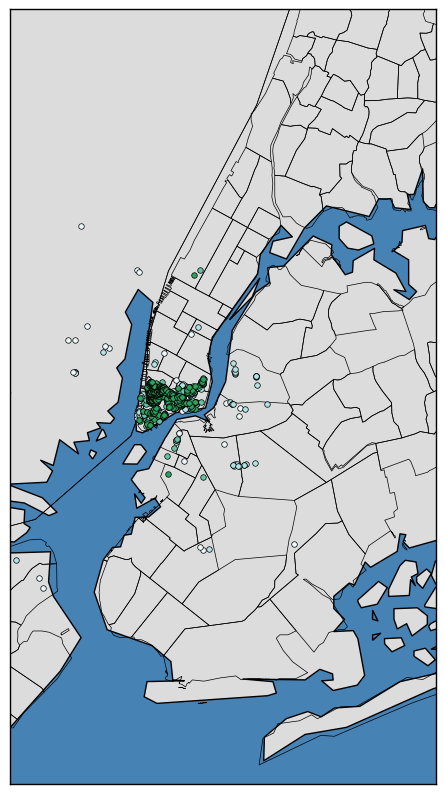

In [278]:
fig = plt.figure(figsize=(20,10))

themap = Basemap(projection='merc',
                llcrnrlon = -74.097444,              # lower-left corner longitude
                llcrnrlat = 40.533572,               # lower-left corner latitude
                urcrnrlon = -73.831712,               # upper-right corner longitude
                urcrnrlat = 40.9,               # upper-right corner latitude
                resolution = 'h',
                area_thresh = 0.1,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.drawstates()
themap.drawrivers()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

themap.readshapefile('./ZillowNeighborhoods-NY/ZillowNeighborhoods-NY', 'regions', drawbounds = True)

color_list = ["#edf8fb", "#b2e2e2", "#66c2a4", "#2ca25f"]
bracket_list = range(1,5)
for bracket in bracket_list:
    man_1_bracket = man_1[man_1["price_bracket"] == bracket]
    x, y = themap(man_1_bracket["longitude"].values, man_1_bracket["latitude"].values)
    themap.plot(x, y, 'o', color=color_list[bracket-1],markersize=4)



plt.show()

### How do different variables affect price?

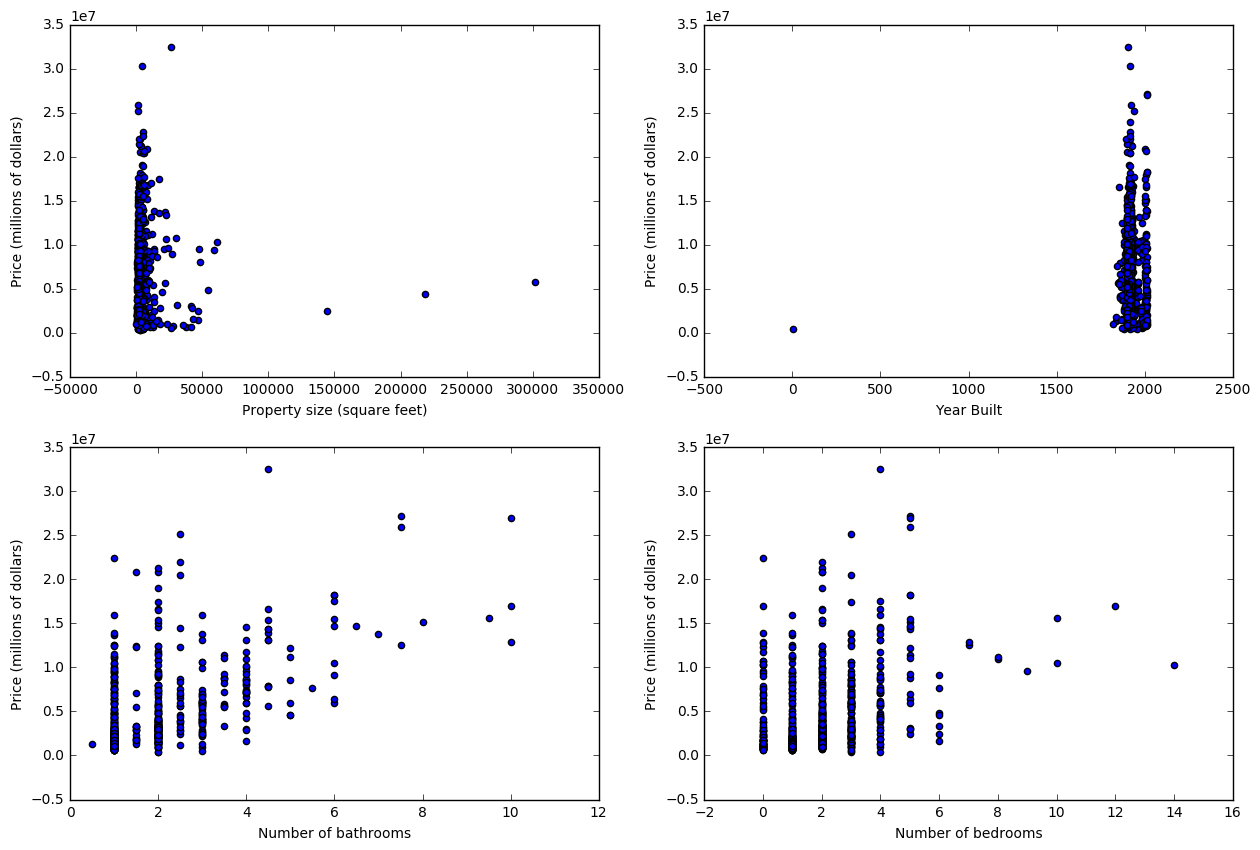

In [325]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,10))

ax1.scatter(man_1["property_size"],man_1["zestimate_amount"])
ax1.set_xlabel("Property size (square feet)")
ax1.set_ylabel("Price (millions of dollars)")

ax2.scatter(man_1["year_built"], man_1["zestimate_amount"])
ax2.set_xlabel("Year Built")
ax2.set_ylabel("Price (millions of dollars)")

ax3.scatter(man_1["bathrooms"], man_1["zestimate_amount"])
ax3.set_xlabel("Number of bathrooms")
ax3.set_ylabel("Price (millions of dollars)")

ax4.scatter(man_1["bedrooms"], man_1["zestimate_amount"])
ax4.set_xlabel("Number of bedrooms")
ax4.set_ylabel("Price (millions of dollars)")

In [ ]:
for i in range (1,6):
    subset = man_1[man_1["bathrooms"] == i]

In [321]:
list(man_1.columns.values)

['tax_value',
 'last_sold_price',
 'property_size',
 'zestimate_amount',
 'bathrooms',
 'zestimate_valuation_range_high',
 'tax_year',
 'zestimate_value_change',
 'latitude',
 'zestimate_percentile',
 'bedrooms',
 'zestimate_last_updated',
 'zillow_id',
 'last_sold_date',
 'year_built',
 'zestimate_valuationRange_low',
 'graph_data_link',
 'home_size',
 'longitude',
 'home_detail_link',
 'home_type',
 'map_this_home_link',
 'Unnamed: 22',
 'high_price_brackets',
 'price_bracket']